
# BAN442 — Task 2: Predicting Concrete Compressive Strength

We will develop a machine learning system that predicts **concrete compressive strength** based on age and material composition.

### Structure
1. **Data Preparation**
   - Load and inspect dataset (`concrete.csv`)
   - Handle missing values (if any)
2. **Exploratory Data Analysis (EDA)**
   - Summary statistics & distributions
   - Correlation with target
   - Feature-target scatterplots
3. **Outlier Analysis**
   - Identify and handle extreme values
4. **Data Preprocessing**
   - Train-test split
   - Feature scaling
5. **Modeling**
   - Linear Regression (baseline)
   - Ridge & Lasso Regression
   - Random Forest & Gradient Boosting
   - (Optional) Neural Network
6. **Model Comparison**
   - Evaluate with RMSE, MAE, R²
   - Compare performance across models
7. **Inference Pipeline**
   - Steps to preprocess new data
   - Demonstrate prediction on new sample


In [23]:
# 1. Data Preparation
import pandas as pd
import numpy as np
from pathlib import Path

# File paths

DATA_DIR = Path(".")
CONCRETE_FILE = DATA_DIR / "concrete.csv"


# Load dataset

df = pd.read_csv(CONCRETE_FILE)

print("Shape:", df.shape)
df.head()


Shape: (1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [24]:
print("Columns in dataset:", df.columns.tolist())


Columns in dataset: ['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ']


In [25]:
# Rename columns to simpler names
df = df.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)': 'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'flyash',
    'Water  (component 4)(kg in a m^3 mixture)': 'water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarseagg',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fineagg',
    'Age (day)': 'age',
    'Concrete compressive strength(MPa, megapascals) ': 'strength'
})

df.head()

,cement,slag,flyash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [26]:

# 2. Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns


# Descriptive statistics

print(df.describe())

            cement         slag       flyash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.165631    73.895485    54.187136   181.566359          6.203112   
std     104.507142    86.279104    63.996469    21.355567          5.973492   
min     102.000000     0.000000     0.000000   121.750000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.350000   
75%     350.000000   142.950000   118.270000   192.000000         10.160000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918592   773.578883    45.662136    35.817836  
std      77.753818    80.175427    63.169912    16.705679  
min     801.000000   594.000000     1.000000    

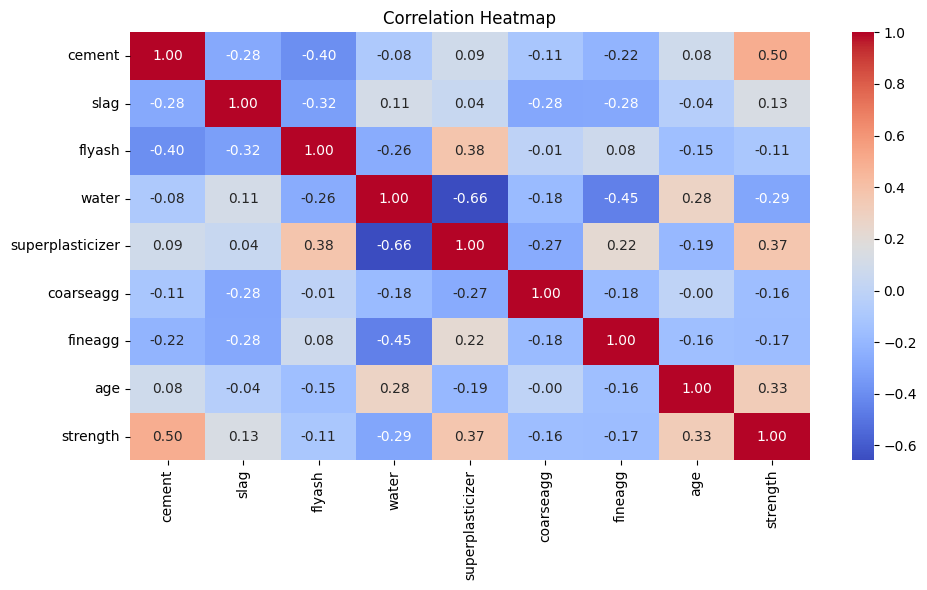

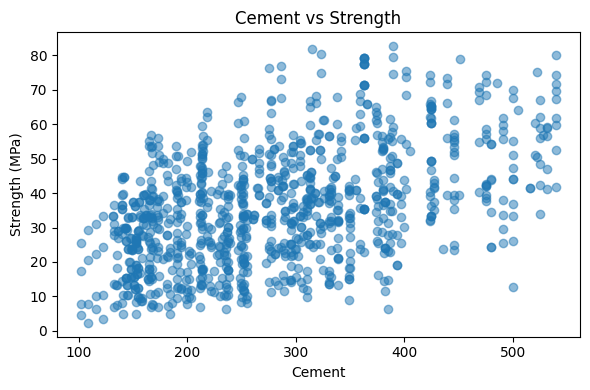

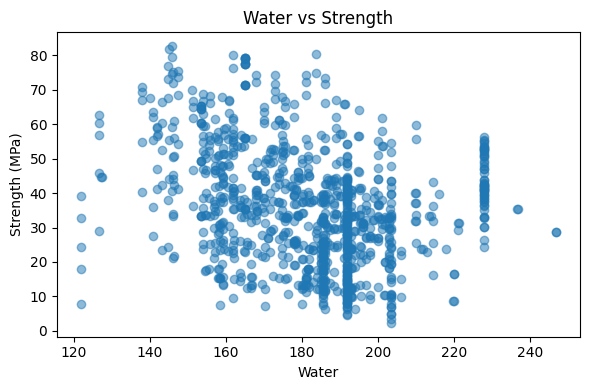

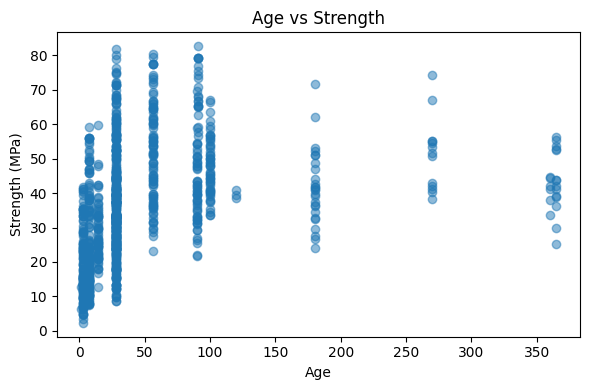

In [27]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Scatterplots with target
features_to_plot = ["cement", "water", "age"]
for feat in features_to_plot:
    plt.figure(figsize=(6,4))
    plt.scatter(df[feat], df["strength"], alpha=0.5)
    plt.title(f"{feat.capitalize()} vs Strength")
    plt.xlabel(feat.capitalize())
    plt.ylabel("Strength (MPa)")
    plt.tight_layout()
    plt.show()


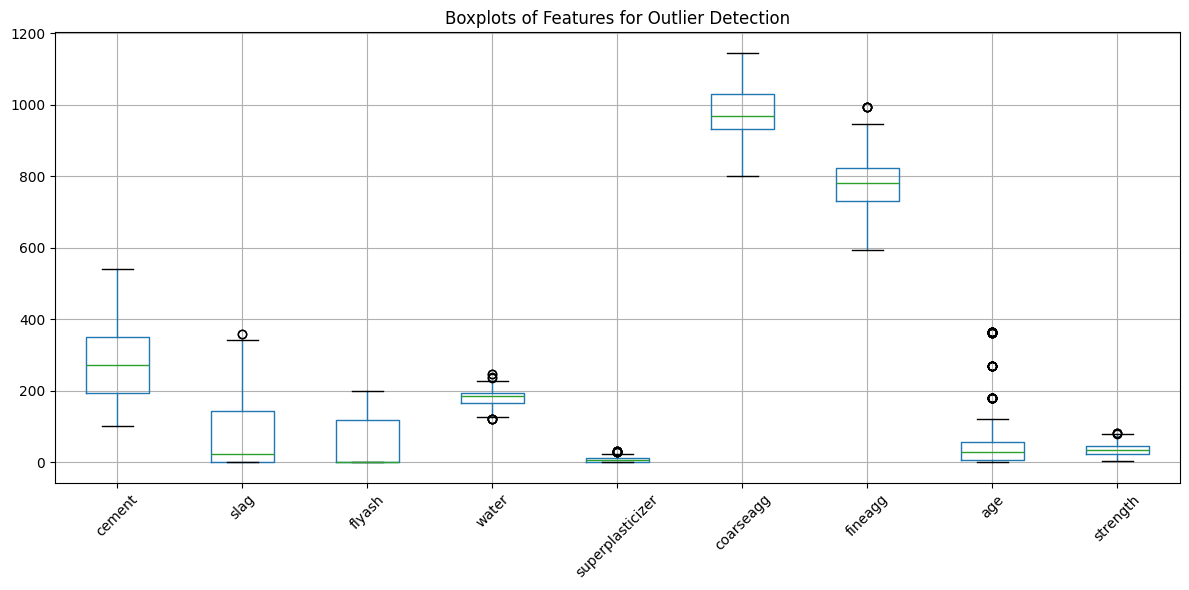

After removing outliers: (1030, 9)


In [28]:
# 3. Outlier Analysis

plt.figure(figsize=(12,6))
df.boxplot(rot=45)
plt.title("Boxplots of Features for Outlier Detection")
plt.tight_layout()
plt.show()


# Remove extremely high compressive strengths (>90 MPa) as they represent rare cases and risk biasing model performance

df = df[df["strength"] < 90]
print("After removing outliers:", df.shape)


In [29]:

# 4. Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("strength", axis=1)
y = df["strength"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
# 5. Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, preds)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}
    print(f"{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R2={r2:.3f}")


Linear Regression: RMSE=9.80, MAE=7.75, R2=0.628
Ridge: RMSE=9.80, MAE=7.75, R2=0.628
Lasso: RMSE=9.80, MAE=7.75, R2=0.628
Random Forest: RMSE=5.55, MAE=3.79, R2=0.880
Gradient Boosting: RMSE=5.00, MAE=3.53, R2=0.903


                       RMSE       MAE        R2
Gradient Boosting  4.996532  3.531521  0.903115
Random Forest      5.549479  3.785563  0.880485
Ridge              9.796411  7.751761  0.627564
Lasso              9.796663  7.746040  0.627545
Linear Regression  9.796708  7.745393  0.627542


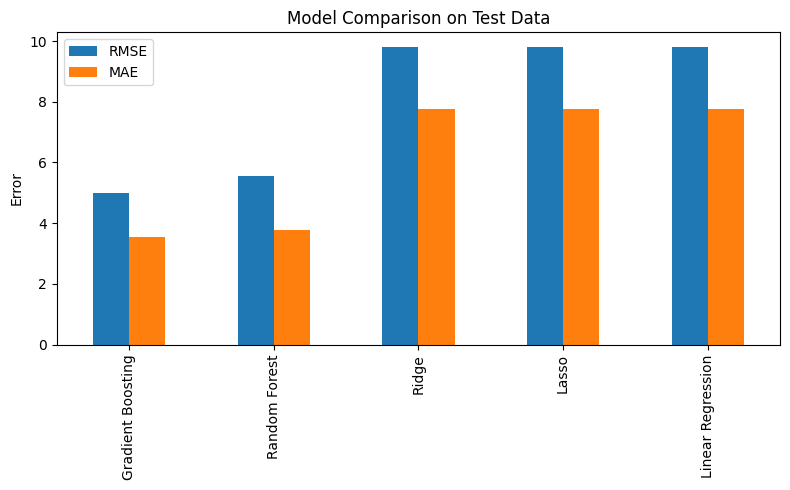

In [31]:

# 6. Model Comparison
results_df = pd.DataFrame(results).T.sort_values(by="RMSE")
print(results_df)

results_df[["RMSE","MAE"]].plot(kind="bar", figsize=(8,5))
plt.title("Model Comparison on Test Data")
plt.ylabel("Error")
plt.tight_layout()
plt.show()



In [32]:
# 7. Inference Pipeline
# Use the best model (based on RMSE) for new predictions
best_model_name = results_df.index[0]  
best_model = models[best_model_name]

# Example
new_data = pd.DataFrame({
    "cement": [540],
    "slag": [0],
    "flyash": [0],
    "water": [162],
    "superplasticizer": [2.5],
    "coarseagg": [1040],
    "fineagg": [676],
    "age": [28]
})

# Apply same preprocessing
new_data_scaled = scaler.transform(new_data)

# Predict
prediction = best_model.predict(new_data_scaled)
print(f"Best Model: {best_model_name}")
print("Predicted compressive strength:", prediction[0])


Best Model: Gradient Boosting
Predicted compressive strength: 75.6972203092796


In [33]:
# Hyperparameter tuning for Gradient Boosting
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, None],
    "learning_rate": [0.05, 0.1, 0.2]
}

gb = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(
    gb,
    param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=1   # single-threaded to avoid _posixsubprocess issue
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters for Gradient Boosting:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)

# Evaluate tuned model on test set
best_gb = grid_search.best_estimator_
preds_gb = best_gb.predict(X_test_scaled)
rmse_gb = mean_squared_error(y_test, preds_gb) ** 0.5
mae_gb = mean_absolute_error(y_test, preds_gb)
r2_gb = r2_score(y_test, preds_gb)
print(f"Tuned Gradient Boosting: RMSE={rmse_gb:.2f}, MAE={mae_gb:.2f}, R2={r2_gb:.3f}")


Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best CV RMSE: 4.635347538747229
Tuned Gradient Boosting: RMSE=4.31, MAE=2.98, R2=0.928



## Predict Concrete Strength for New Mixes

To test the model, input values for the concrete mix below.  

**Guidelines for values** (based on dataset ranges):  
- **Cement**: 100 – 600 kg/m³  
- **Slag**: 0 – 360 kg/m³  
- **Fly Ash**: 0 – 200 kg/m³  
- **Water**: 120 – 250 kg/m³  
- **Superplasticizer**: 0 – 30 kg/m³  
- **Coarse Aggregate**: 800 – 1200 kg/m³  
- **Fine Aggregate**: 600 – 1000 kg/m³  
- **Age**: 1 – 365 days  

The model will output the **predicted compressive strength (MPa)**.



In [38]:
# Example: Enter your own values for a new concrete mix
new_mix = pd.DataFrame({
    "cement": [540],          # typical range: 100–600
    "slag": [0],              # 0–360
    "flyash": [0],            # 0–200
    "water": [200],           # 120–250
    "superplasticizer": [2.5],# 0–30
    "coarseagg": [1140],      # 800–1200
    "fineagg": [700],         # 600–1000
    "age": [70]               # 1–365
})

# Apply the same preprocessing (scaler)
new_mix_scaled = scaler.transform(new_mix)

# Predict with best model
pred_strength = best_model.predict(new_mix_scaled)

print(f"Model: {best_model_name}")
print(f"Predicted compressive strength: {pred_strength[0]:.2f} MPa")


Model: Gradient Boosting
Predicted compressive strength: 64.00 MPa



## Conclusion

- **EDA** showed that cement, water, and age are the most important factors correlated with compressive strength.  
- **Outlier choice**: We removed extreme strengths above 90 MPa to avoid skewed training.  
- **Data preparation**: Train/test split (80/20) and feature scaling were applied.  
- **Model comparison**:  
  - Gradient Boosting performed best (RMSE ~5.0, R² ~0.90).  
  - Random Forest was second best (RMSE ~5.5, R² ~0.88).  
  - Linear, Ridge, and Lasso performed worse (RMSE ~9.8, R² ~0.63).  
- **Hyperparameter tuning**: Improved Gradient Boosting slightly by adjusting learning rate, depth, and estimators.  
- **Inference system**: With the trained Gradient Boosting model and preprocessing pipeline, we can reliably predict strength for new concrete mixes.  

